<a href="https://colab.research.google.com/github/seonghaiiiii/busan-car-accident/blob/main/busan_eclo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/데이콘/대구교통사고/data/countrywide_accident.csv')

In [ ]:
train = train[train['시군구'].str.startswith('부산광역시')]

In [ ]:
train_df = train[['사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','법규위반','사망자수','중상자수','경상자수','부상자수','ECLO']]

In [ ]:
train_df

,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO
11,2019-01-01 00,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10
12,2019-01-01 00,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5
30,2019-01-01 01,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5
48,2019-01-01 02,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11
54,2019-01-01 03,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021-12-31 22,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8
602755,2021-12-31 22,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4
602758,2021-12-31 22,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9
602769,2021-12-31 23,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5


#train, test 분리

In [ ]:
# '사고일시' 열을 datetime 타입으로 변환
train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])

# '년도', '월', '일', '시간' 열 추가
train_df['year'] = train_df['사고일시'].dt.year
train_df['month'] = train_df['사고일시'].dt.month
train_df['day'] = train_df['사고일시'].dt.day
train_df['hour'] = train_df['사고일시'].dt.hour

<ipython-input-7-43ce9faddc7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['사고일시'] = pd.to_datetime(train_df['사고일시'])
<ipython-input-7-43ce9faddc7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['year'] = train_df['사고일시'].dt.year
<ipython-input-7-43ce9faddc7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
# '사고일시' 열 삭제
train_df = train_df.drop('사고일시', axis=1)

In [ ]:
train_df = train_df.drop('day', axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      36244 non-null  object
 1   기상상태    36244 non-null  object
 2   시군구     36244 non-null  object
 3   도로형태    36244 non-null  object
 4   노면상태    36244 non-null  object
 5   사고유형    36244 non-null  object
 6   법규위반    36244 non-null  object
 7   사망자수    36244 non-null  int64 
 8   중상자수    36244 non-null  int64 
 9   경상자수    36244 non-null  int64 
 10  부상자수    36244 non-null  int64 
 11  ECLO    36244 non-null  int64 
 12  year    36244 non-null  int64 
 13  month   36244 non-null  int64 
 14  hour    36244 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.4+ MB


In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df[(train_df['year'] >= 2019) & (train_df['year'] <= 2020) | (train_df['year'] == 2021) & (train_df['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df[(train_df['year'] == 2021) & (train_df['month'] >= 10)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33337 entries, 11 to 552562
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      33337 non-null  object
 1   기상상태    33337 non-null  object
 2   시군구     33337 non-null  object
 3   도로형태    33337 non-null  object
 4   노면상태    33337 non-null  object
 5   사고유형    33337 non-null  object
 6   법규위반    33337 non-null  object
 7   사망자수    33337 non-null  int64 
 8   중상자수    33337 non-null  int64 
 9   경상자수    33337 non-null  int64 
 10  부상자수    33337 non-null  int64 
 11  ECLO    33337 non-null  int64 
 12  year    33337 non-null  int64 
 13  month   33337 non-null  int64 
 14  hour    33337 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 4.1+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 552633 to 602770
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      2907 non-null   object
 1   기상상태    2907 non-null   object
 2   시군구     2907 non-null   object
 3   도로형태    2907 non-null   object
 4   노면상태    2907 non-null   object
 5   사고유형    2907 non-null   object
 6   법규위반    2907 non-null   object
 7   사망자수    2907 non-null   int64 
 8   중상자수    2907 non-null   int64 
 9   경상자수    2907 non-null   int64 
 10  부상자수    2907 non-null   int64 
 11  ECLO    2907 non-null   int64 
 12  year    2907 non-null   int64 
 13  month   2907 non-null   int64 
 14  hour    2907 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 363.4+ KB


# 결측치 및 이상치 확인

In [ ]:
train.isnull().sum()

요일       0
기상상태     0
시군구      0
도로형태     0
노면상태     0
사고유형     0
법규위반     0
사망자수     0
중상자수     0
경상자수     0
부상자수     0
ECLO     0
year     0
month    0
hour     0
dtype: int64

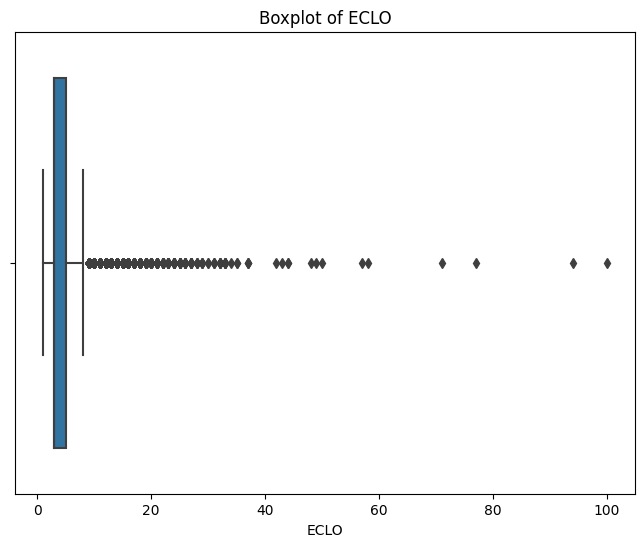

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ECLO 열에 대한 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['ECLO'])
plt.title('Boxplot of ECLO')
plt.show()

In [ ]:
# # ECLO가 40 이상인 행 선택
# eclo_over_40 = train[train['ECLO'] > 40]

# # 선택된 행 출력
# eclo_over_40

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour
11512,목요일,맑음,부산광역시 사상구 덕포동,단일로 - 기타,건조,차대사람,안전운전불이행,0,3,19,5,77,2019,1,15
27579,월요일,맑음,부산광역시 사하구 하단동,단일로 - 지하차도(도로)내,건조,차대차,안전운전불이행,0,9,16,1,94,2019,2,18
49906,토요일,맑음,부산광역시 동래구 명륜동,단일로 - 기타,건조,차대차,과속,0,5,6,1,44,2019,4,22
217201,일요일,맑음,부산광역시 부산진구 당감동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,2,11,0,43,2020,1,17
223367,금요일,맑음,부산광역시 동구 초량동,단일로 - 기타,건조,차대차,안전운전불이행,0,7,5,0,50,2020,1,6
245698,금요일,비,부산광역시 동구 초량동,단일로 - 기타,젖음/습기,차량단독,안전운전불이행,0,10,7,0,71,2020,2,16
270384,화요일,맑음,부산광역시 강서구 미음동,교차로 - 교차로안,건조,차대차,신호위반,0,2,13,0,49,2020,4,7
324524,토요일,맑음,부산광역시 동구 초량동,기타 - 기타,건조,차대차,안전거리미확보,0,3,9,2,44,2020,7,22
454238,화요일,맑음,부산광역시 동래구 명륜동,단일로 - 기타,건조,차대차,신호위반,0,5,10,3,58,2021,3,18
469991,수요일,맑음,부산광역시 사상구 모라동,단일로 - 기타,건조,차량단독,기타,0,11,15,0,100,2021,4,20


In [ ]:
# # ECLO가 40 초과인 행 제거
# train = train[train['ECLO'] <= 40]

#ECLO 그룹화


In [ ]:
train_df['ECLO'].describe()

count    36244.000000
mean         4.631994
std          3.190126
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max        100.000000
Name: ECLO, dtype: float64

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.4 MB/s eta 0:00:00


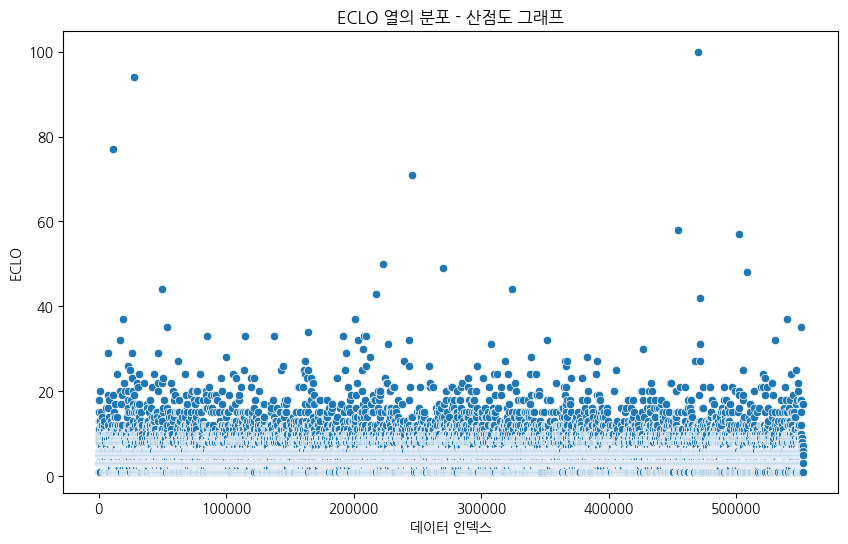

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train.index, y=train['ECLO'])
plt.title('ECLO 열의 분포 - 산점도 그래프')
plt.xlabel('데이터 인덱스')
plt.ylabel('ECLO')
plt.show()


In [ ]:
def eclo_group(a):
    if a<=4:
        return 'safe'
    elif a<=9:
        return 'Cautionary'
    else:
        return 'dangerous'

train['ECLO_group'] = train['ECLO'].apply(eclo_group)
train['ECLO_group'].value_counts()

<ipython-input-15-4c64add07006>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ECLO_group'] = train['ECLO'].apply(eclo_group)


safe          18347
Cautionary    12889
dangerous      2101
Name: ECLO_group, dtype: int64

In [ ]:
test['ECLO_group'] = test['ECLO'].apply(eclo_group)
test['ECLO_group'].value_counts()

<ipython-input-16-300d1b1284c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ECLO_group'] = test['ECLO'].apply(eclo_group)


safe          1596
Cautionary    1135
dangerous      176
Name: ECLO_group, dtype: int64

#train 시각화

<Figure size 1400x2600 with 0 Axes>

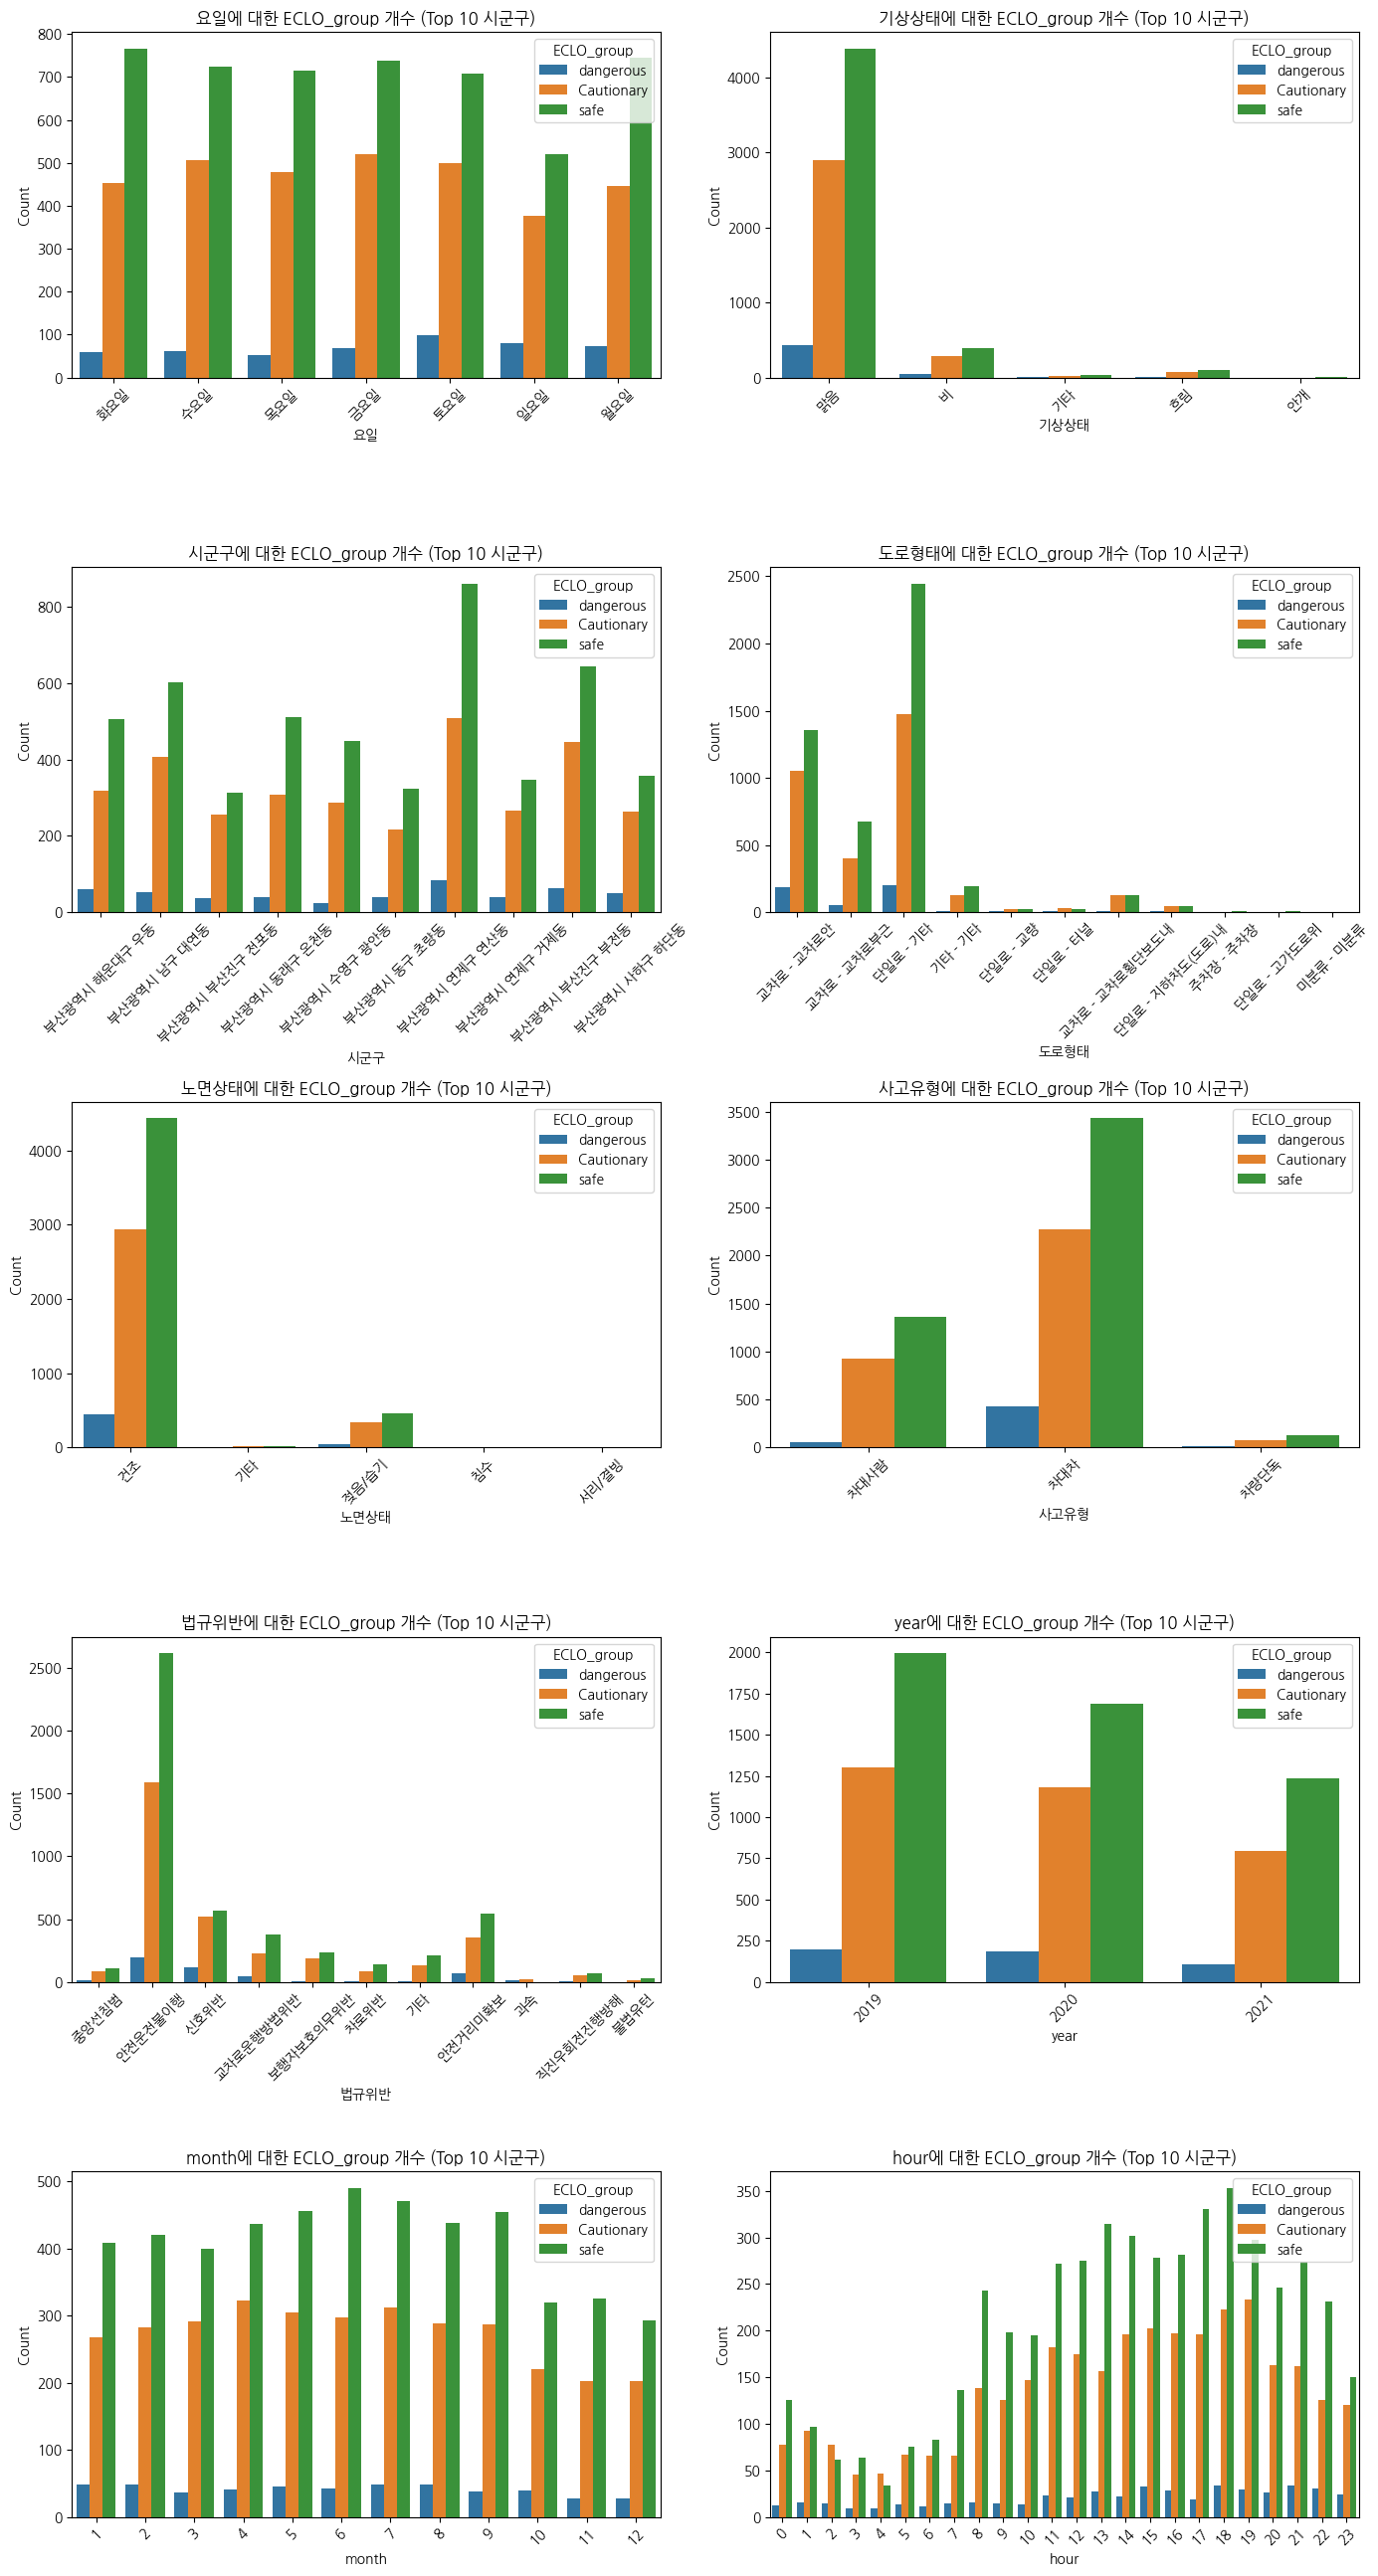

In [ ]:
# 그래프의 행과 열 개수
rows, cols = 5, 2

# 그래프 크기 설정
plt.figure(figsize=(14, 26))

# 시군구 빈도수 계산
top_n = 10  # 상위 N개 시군구 선택
top_sigu_counts = train['시군구'].value_counts().nlargest(top_n)

# 상위 N개 시군구에 해당하는 데이터만 선택
train_top_n_sigu = train[train['시군구'].isin(top_sigu_counts.index)]

columns = ['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '법규위반', 'year', 'month', 'hour']

# 그래프 그리기
plt.figure(figsize=(14, 26))

i = 1
for col in columns:
    plt.subplot(rows, cols, i)
    sns.countplot(x=train_top_n_sigu[col], hue=train_top_n_sigu['ECLO_group'])
    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 ECLO_group 개수 (Top {top_n} 시군구)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='ECLO_group', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


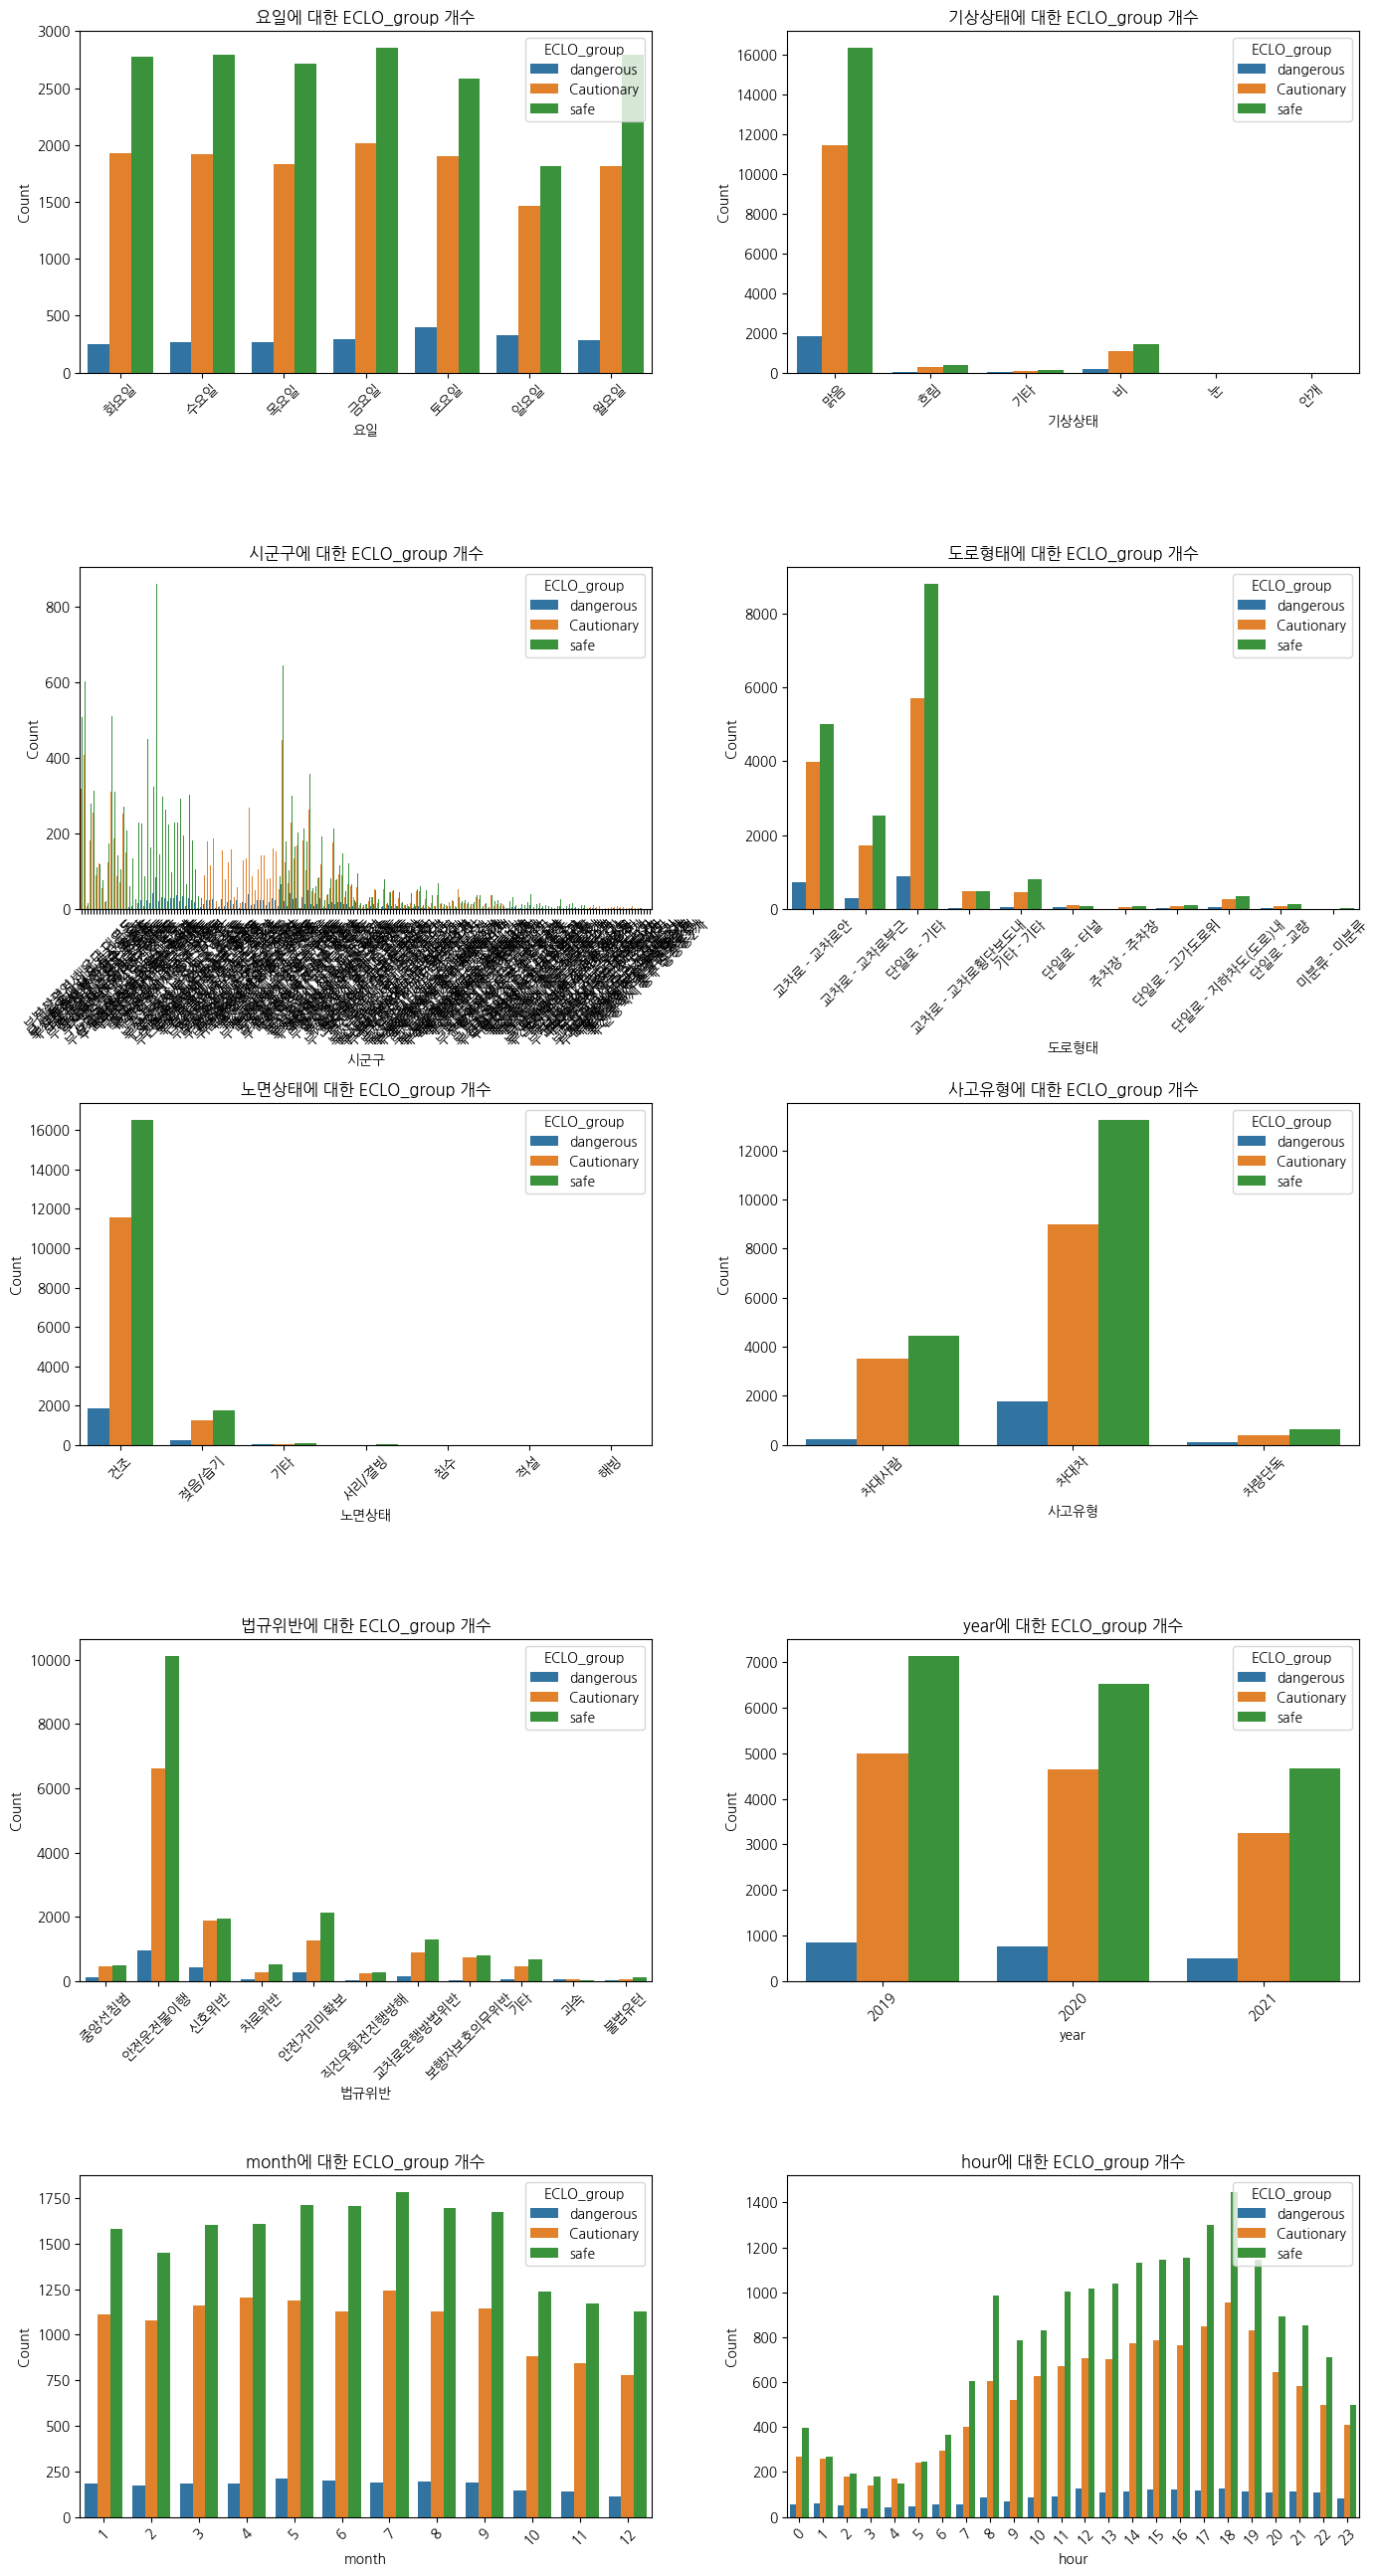

In [ ]:
# 그래프의 행과 열 개수
rows, cols = 5, 2

# 그래프 크기 설정
plt.figure(figsize=(14, 26))

# 열 이름 리스트
columns = ['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '법규위반', 'year', 'month', 'hour']

# 서브플롯 인덱스 초기화
i = 1

# 각 열에 대해 그래프 그리기
for col in columns:
    plt.subplot(rows, cols, i)
    sns.countplot(x=train[col], hue=train['ECLO_group'])
    plt.xticks(rotation=45)
    plt.title(f'{col}에 대한 ECLO_group 개수')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='ECLO_group', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


#Random Forest

In [ ]:
def eclo_group(a):
    if a<=3.5:
        return 'safe'
    elif a<=5:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe          19460
Cautionary     8632
dangerous      8152
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO','ECLO_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   시군구         36244 non-null  object
 3   도로형태        36244 non-null  object
 4   노면상태        36244 non-null  object
 5   사고유형        36244 non-null  object
 6   year        36244 non-null  int64 
 7   month       36244 non-null  int64 
 8   hour        36244 non-null  int64 
 9   ECLO        36244 non-null  int64 
 10  ECLO_group  36244 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [ ]:
train_df1 = train_df1[train_df1['ECLO'] <= 40]

In [ ]:
train_df1 = train_df1.drop('ECLO', axis=1)

In [ ]:
#One - Hot Encoding
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
11,2019,1,0,dangerous,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12,2019,1,0,Cautionary,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
30,2019,1,1,Cautionary,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
48,2019,1,2,dangerous,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
54,2019,1,3,safe,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552483,2021,9,19,safe,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
552495,2021,9,19,safe,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
552496,2021,9,19,safe,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
552537,2021,9,21,safe,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
test

,year,month,hour,ECLO_group,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,...,노면상태_건조,노면상태_기타,노면상태_서리/결빙,노면상태_적설,노면상태_젖음/습기,노면상태_침수,노면상태_해빙,사고유형_차대사람,사고유형_차대차,사고유형_차량단독
552633,2021,10,7,Cautionary,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
552634,2021,10,7,Cautionary,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
552658,2021,10,8,dangerous,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
552659,2021,10,8,dangerous,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
552721,2021,10,10,safe,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,2021,12,22,dangerous,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
602755,2021,12,22,Cautionary,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
602758,2021,12,22,dangerous,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
602769,2021,12,23,Cautionary,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
train_x = train.drop(['ECLO_group'],axis = 1)
train_y = train['ECLO_group']
test_x = test.drop(['ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# RandomForestClassifier 모델 정의
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.46224375578773036
macro F1 Score: 0.3735307430975259
Accuracy: 0.518582243633861
Macro Precision: 0.438122696913364
              precision    recall  f1-score   support

  Cautionary       0.40      0.18      0.25       677
   dangerous       0.37      0.15      0.21       662
        safe       0.55      0.82      0.66      1567

    accuracy                           0.52      2906
   macro avg       0.44      0.38      0.37      2906
weighted avg       0.47      0.52      0.46      2906



#lightgbm 라벨


In [ ]:
def eclo_group(a):
    if a<=4:
        return 'safe'
    elif a<=9:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe          19943
Cautionary    14024
dangerous      2277
Name: ECLO_group, dtype: int64

In [ ]:
train_df

,요일,기상상태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour,ECLO_group,구,동,도로형태1,도로형태2
11,화요일,맑음,건조,차대사람,중앙선침범,1,0,0,0,10,2019,1,0,dangerous,해운대구,우동,교차로,교차로안
12,화요일,맑음,건조,차대차,안전운전불이행,0,1,0,0,5,2019,1,0,Cautionary,남구,대연동,교차로,교차로부근
30,화요일,맑음,건조,차대사람,안전운전불이행,0,1,0,0,5,2019,1,1,Cautionary,서구,토성동5가,단일로,기타
48,화요일,맑음,건조,차대차,신호위반,0,1,2,0,11,2019,1,2,dangerous,부산진구,양정동,교차로,교차로안
54,화요일,맑음,건조,차대차,신호위반,0,0,1,0,3,2019,1,3,safe,부산진구,전포동,교차로,교차로안
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,금요일,맑음,건조,차대차,안전운전불이행,0,1,1,0,8,2021,12,22,Cautionary,해운대구,우동,교차로,교차로안
602755,금요일,맑음,건조,차대차,안전운전불이행,0,0,1,1,4,2021,12,22,safe,금정구,남산동,교차로,교차로부근
602758,금요일,흐림,건조,차대차,안전운전불이행,0,0,3,0,9,2021,12,22,Cautionary,해운대구,중동,기타,기타
602769,금요일,맑음,건조,차대차,안전운전불이행,0,1,0,0,5,2021,12,23,Cautionary,연제구,연산동,단일로,기타


In [ ]:
train_df1 = train_df[['요일', '기상상태','노면상태','사고유형','year','month','hour','ECLO_group','구','동','도로형태1','도로형태2']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   노면상태        36244 non-null  object
 3   사고유형        36244 non-null  object
 4   year        36244 non-null  int64 
 5   month       36244 non-null  int64 
 6   hour        36244 non-null  int64 
 7   ECLO_group  36244 non-null  object
 8   구           36244 non-null  object
 9   동           36244 non-null  object
 10  도로형태1       36244 non-null  object
 11  도로형태2       36244 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# 여러 열에 대해 일괄적으로 라벨 인코딩 적용
train_df1[['요일','기상상태','노면상태','사고유형','구','동','도로형태1','도로형태2']] = train_df1[['요일','기상상태','노면상태','사고유형','구','동','도로형태1','도로형태2']].apply(label_encoder.fit_transform)


<ipython-input-104-cf89fd3d02e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1[['요일','기상상태','노면상태','사고유형','구','동','도로형태1','도로형태2']] = train_df1[['요일','기상상태','노면상태','사고유형','구','동','도로형태1','도로형태2']].apply(label_encoder.fit_transform)


In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['ECLO_group'],axis = 1)
train_y = train['ECLO_group']
test_x = test.drop(['ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, classification_report

# RandomForestClassifier 모델 정의
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.48496880096723255
macro F1 Score: 0.33073718049882256
Accuracy: 0.5190918472652218
Macro Precision: 0.3496142801459207
              precision    recall  f1-score   support

  Cautionary       0.42      0.29      0.34      1135
   dangerous       0.07      0.01      0.01       176
        safe       0.56      0.74      0.64      1596

    accuracy                           0.52      2907
   macro avg       0.35      0.35      0.33      2907
weighted avg       0.48      0.52      0.48      2907



#Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# XGBClassifier 모델 정의
model = XGBClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train_encoded)

# 테스트 데이터 예측
predictions = model.predict(test_x)

In [ ]:
# LabelEncoder를 사용하여 문자열 클래스 레이블을 숫자로 변환
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# F1 스코어 계산
f1_1 = f1_score(test_y_encoded, predictions, average='weighted')
f1_2 = f1_score(test_y_encoded, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y_encoded, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y_encoded, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y_encoded, predictions))

Weighted F1 Score: 0.4728621775327435
macro F1 Score: 0.3172633777216561
Accuracy: 0.5467997247075017
Macro Precision: 0.5071060041097698
              precision    recall  f1-score   support

           0       0.46      0.17      0.25      1135
           1       0.50      0.01      0.02       175
           2       0.56      0.88      0.68      1596

    accuracy                           0.55      2906
   macro avg       0.51      0.35      0.32      2906
weighted avg       0.52      0.55      0.47      2906



#LightGBM

In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 26659, number of used features: 165
[LightGBM] [Info] Start training from score -1.429802
[LightGBM] [Info] Start training from score -1.497218
[LightGBM] [Info] Start training from score -0.621959


In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.44268698849826976
macro F1 Score: 0.3313107000687981
Accuracy: 0.543358568479009
Macro Precision: 0.4965800112693497
              precision    recall  f1-score   support

  Cautionary       0.48      0.10      0.17       677
   dangerous       0.46      0.08      0.13       662
        safe       0.55      0.93      0.69      1567

    accuracy                           0.54      2906
   macro avg       0.50      0.37      0.33      2906
weighted avg       0.51      0.54      0.44      2906



#회귀로 예측 후 그룹화해서 평가

##xgboost

In [ ]:
def eclo_group(a):
    if a<=4:
        return 'safe'
    elif a<=9:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe          19943
Cautionary    14024
dangerous      2277
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO','ECLO_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   시군구         36244 non-null  object
 3   도로형태        36244 non-null  object
 4   노면상태        36244 non-null  object
 5   사고유형        36244 non-null  object
 6   year        36244 non-null  int64 
 7   month       36244 non-null  int64 
 8   hour        36244 non-null  int64 
 9   ECLO        36244 non-null  int64 
 10  ECLO_group  36244 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [ ]:
#원핫인코딩
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['ECLO','ECLO_group'],axis = 1)
train_y = train['ECLO']
test_x = test.drop(['ECLO','ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from xgboost import XGBRegressor

# XGBoost 회귀 모델 정의
model = XGBRegressor(random_state=42)

# 모델 학습
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# 모델을 사용하여 test_x에 대한 예측 수행
predictions = model.predict(test_x)

In [ ]:
predictions

array([3.9463677, 3.6587358, 4.2039247, ..., 7.9594507, 4.572815 ,
       4.846891 ], dtype=float32)

In [ ]:
def eclo_group2(a):
    if a<4.5:
        return 'safe'
    elif a<9.5:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group2)
train_df['ECLO_group'].value_counts()

# 예측값에 대해 eclo_group 함수 적용
predictions2 = [eclo_group2(pred) for pred in predictions]

# 결과 출력 또는 사용
predictions2

['safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'dangerous',
 '

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions2, average='weighted')
f1_2 = f1_score(test_y, predictions2, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions2)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions2, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions2))

Weighted F1 Score: 0.4712242088028015
macro F1 Score: 0.335736906218882
Accuracy: 0.4802201582387341
Macro Precision: 0.37110198747268286
              precision    recall  f1-score   support

  Cautionary       0.40      0.52      0.45      1135
   dangerous       0.14      0.01      0.02       176
        safe       0.57      0.50      0.54      1596

    accuracy                           0.48      2907
   macro avg       0.37      0.35      0.34      2907
weighted avg       0.48      0.48      0.47      2907



##random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 모델을 사용하여 test_x에 대한 예측 수행
predictions = rf_model.predict(test_x)

In [ ]:
predictions

array([3.62, 3.79, 4.03, ..., 4.4 , 4.1 , 5.31])

In [ ]:
def eclo_group2(a):
    if a<4.5:
        return 'safe'
    elif a<9.5:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group2)
train_df['ECLO_group'].value_counts()

# 예측값에 대해 eclo_group 함수 적용
predictions2 = [eclo_group2(pred) for pred in predictions]

# 결과 출력 또는 사용
predictions2

['safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'dangerous',
 'safe',
 'safe',
 'dangerous',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'dangerous',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'dangerous',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'Cautio

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions2, average='weighted')
f1_2 = f1_score(test_y, predictions2, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions2)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions2, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions2))

Weighted F1 Score: 0.4795403379383242
macro F1 Score: 0.34384739890555815
Accuracy: 0.49226006191950467
Macro Precision: 0.35485949779884635
              precision    recall  f1-score   support

  Cautionary       0.40      0.38      0.39      1135
   dangerous       0.10      0.03      0.05       176
        safe       0.56      0.62      0.59      1596

    accuracy                           0.49      2907
   macro avg       0.35      0.35      0.34      2907
weighted avg       0.47      0.49      0.48      2907



##LightGBM


In [ ]:
import lightgbm as lgb

# LightGBM 회귀 모델 정의
lgb_model = lgb.LGBMRegressor(random_state=42)

# 모델 학습
lgb_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 26669, number of used features: 162
[LightGBM] [Info] Start training from score 4.641344


LGBMRegressor(random_state=42)

In [ ]:
# 모델을 사용하여 test_x에 대한 예측 수행
predictions = lgb_model.predict(test_x)

In [ ]:
predictions

array([3.96319685, 4.22494503, 4.68387089, ..., 3.82451859, 4.33076654,
       5.23759911])

In [ ]:
def eclo_group2(a):
    if a<4.5:
        return 'safe'
    elif a<9.5:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group2)
train_df['ECLO_group'].value_counts()

# 예측값에 대해 eclo_group 함수 적용
predictions2 = [eclo_group2(pred) for pred in predictions]

# 결과 출력 또는 사용
predictions2

['safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary'

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions2, average='weighted')
f1_2 = f1_score(test_y, predictions2, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions2)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions2, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions2))

Weighted F1 Score: 0.4685286207088791
macro F1 Score: 0.3330228348685845
Accuracy: 0.478500171998624
Macro Precision: 0.6515478164469857
              precision    recall  f1-score   support

  Cautionary       0.39      0.49      0.44      1135
   dangerous       1.00      0.01      0.02       176
        safe       0.57      0.52      0.54      1596

    accuracy                           0.48      2907
   macro avg       0.65      0.34      0.33      2907
weighted avg       0.52      0.48      0.47      2907



##random forest 이상치 제거 후

In [ ]:
def eclo_group(a):
    if a<=4:
        return 'safe'
    elif a<=9:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group)
train_df['ECLO_group'].value_counts()

safe          19943
Cautionary    14024
dangerous      2277
Name: ECLO_group, dtype: int64

In [ ]:
train_df1 = train_df[['요일', '기상상태', '시군구', '도로형태', '노면상태','사고유형','year','month','hour','ECLO','ECLO_group']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   시군구         36244 non-null  object
 3   도로형태        36244 non-null  object
 4   노면상태        36244 non-null  object
 5   사고유형        36244 non-null  object
 6   year        36244 non-null  int64 
 7   month       36244 non-null  int64 
 8   hour        36244 non-null  int64 
 9   ECLO        36244 non-null  int64 
 10  ECLO_group  36244 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [ ]:
train_df1 = train_df1[train_df1['ECLO'] <= 40]

In [ ]:
#원핫인코딩
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','시군구','도로형태','노면상태','사고유형'])

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['ECLO','ECLO_group'],axis = 1)
train_y = train['ECLO']
test_x = test.drop(['ECLO','ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 정의
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 모델을 사용하여 test_x에 대한 예측 수행
predictions = rf_model.predict(test_x)

In [ ]:
def eclo_group2(a):
    if a<4.5:
        return 'safe'
    elif a<9.5:
        return 'Cautionary'
    else:
        return 'dangerous'

train_df['ECLO_group'] = train_df['ECLO'].apply(eclo_group2)
train_df['ECLO_group'].value_counts()

# 예측값에 대해 eclo_group 함수 적용
predictions2 = [eclo_group2(pred) for pred in predictions]

# 결과 출력 또는 사용
predictions2

['safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'safe',
 'dangerous',
 'Cautionary',
 'safe',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'dangerous',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'dangerous',
 'Cautionary',
 'safe',
 'safe',
 'safe',
 'Cautionary',
 'dangerous',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 'Cautionary',
 'Cautionary',
 'safe',
 '

In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions2, average='weighted')
f1_2 = f1_score(test_y, predictions2, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions2)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions2, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions2))

Weighted F1 Score: 0.48101667474986715
macro F1 Score: 0.3376798702731807
Accuracy: 0.4951823812801101
Macro Precision: 0.34268435624040566
              precision    recall  f1-score   support

  Cautionary       0.40      0.38      0.39      1135
   dangerous       0.06      0.02      0.03       175
        safe       0.56      0.63      0.59      1596

    accuracy                           0.50      2906
   macro avg       0.34      0.34      0.34      2906
weighted avg       0.47      0.50      0.48      2906



#다시 데이터 가공

In [ ]:
train_df

,요일,기상상태,시군구,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour,ECLO_group
11,화요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,2019,1,0,dangerous
12,화요일,맑음,부산광역시 남구 대연동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,2019,1,0,Cautionary
30,화요일,맑음,부산광역시 서구 토성동5가,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,2019,1,1,Cautionary
48,화요일,맑음,부산광역시 부산진구 양정동,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,2019,1,2,dangerous
54,화요일,맑음,부산광역시 부산진구 전포동,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,2019,1,3,safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,금요일,맑음,부산광역시 해운대구 우동,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,2021,12,22,Cautionary
602755,금요일,맑음,부산광역시 금정구 남산동,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,2021,12,22,safe
602758,금요일,흐림,부산광역시 해운대구 중동,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,2021,12,22,Cautionary
602769,금요일,맑음,부산광역시 연제구 연산동,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,2021,12,23,Cautionary


In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_df['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])

train_df

KeyError: ignored

In [ ]:
train_df = train_df.drop(columns=['도시'])
train_df

,요일,기상상태,도로형태,노면상태,사고유형,법규위반,사망자수,중상자수,경상자수,부상자수,ECLO,year,month,hour,ECLO_group,구,동
11,화요일,맑음,교차로 - 교차로안,건조,차대사람,중앙선침범,1,0,0,0,10,2019,1,0,dangerous,해운대구,우동
12,화요일,맑음,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,1,0,0,5,2019,1,0,Cautionary,남구,대연동
30,화요일,맑음,단일로 - 기타,건조,차대사람,안전운전불이행,0,1,0,0,5,2019,1,1,Cautionary,서구,토성동5가
48,화요일,맑음,교차로 - 교차로안,건조,차대차,신호위반,0,1,2,0,11,2019,1,2,dangerous,부산진구,양정동
54,화요일,맑음,교차로 - 교차로안,건조,차대차,신호위반,0,0,1,0,3,2019,1,3,safe,부산진구,전포동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602754,금요일,맑음,교차로 - 교차로안,건조,차대차,안전운전불이행,0,1,1,0,8,2021,12,22,Cautionary,해운대구,우동
602755,금요일,맑음,교차로 - 교차로부근,건조,차대차,안전운전불이행,0,0,1,1,4,2021,12,22,safe,금정구,남산동
602758,금요일,흐림,기타 - 기타,건조,차대차,안전운전불이행,0,0,3,0,9,2021,12,22,Cautionary,해운대구,중동
602769,금요일,맑음,단일로 - 기타,건조,차대차,안전운전불이행,0,1,0,0,5,2021,12,23,Cautionary,연제구,연산동


In [ ]:
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_df['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   노면상태        36244 non-null  object
 3   사고유형        36244 non-null  object
 4   법규위반        36244 non-null  object
 5   사망자수        36244 non-null  int64 
 6   중상자수        36244 non-null  int64 
 7   경상자수        36244 non-null  int64 
 8   부상자수        36244 non-null  int64 
 9   ECLO        36244 non-null  int64 
 10  year        36244 non-null  int64 
 11  month       36244 non-null  int64 
 12  hour        36244 non-null  int64 
 13  ECLO_group  36244 non-null  object
 14  구           36244 non-null  object
 15  동           36244 non-null  object
 16  도로형태1       36244 non-null  object
 17  도로형태2       36244 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.3+ MB


In [ ]:
train_df1 = train_df[['요일', '기상상태','노면상태','사고유형','year','month','hour','ECLO_group','구','동','도로형태1','도로형태2']]
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 11 to 602770
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   요일          36244 non-null  object
 1   기상상태        36244 non-null  object
 2   노면상태        36244 non-null  object
 3   사고유형        36244 non-null  object
 4   year        36244 non-null  int64 
 5   month       36244 non-null  int64 
 6   hour        36244 non-null  int64 
 7   ECLO_group  36244 non-null  object
 8   구           36244 non-null  object
 9   동           36244 non-null  object
 10  도로형태1       36244 non-null  object
 11  도로형태2       36244 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.6+ MB


In [ ]:
#One - Hot Encoding
train_df1 = pd.get_dummies(train_df1, columns=['요일','기상상태','노면상태','사고유형','구','동','도로형태1','도로형태2'])

In [ ]:
# 2019년부터 2021년 9월까지의 데이터
train = train_df1[(train_df1['year'] >= 2019) & (train_df1['year'] <= 2020) | (train_df1['year'] == 2021) & (train_df1['month'] <= 9)]

# 2021년 10월부터 2021년 12월까지의 데이터
test = train_df1[(train_df1['year'] == 2021) & (train_df1['month'] >= 10)]

In [ ]:
train_x = train.drop(['ECLO_group'],axis = 1)
train_y = train['ECLO_group']
test_x = test.drop(['ECLO_group'],axis = 1)
test_y = test['ECLO_group']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x, train_y, test_size = 0.2, random_state = 42)

In [ ]:
import lightgbm as lgb

# LightGBM 모델 정의
model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
model.fit(x_train, y_train)

# 테스트 데이터 예측
predictions = model.predict(test_x)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 26669, number of used features: 180
[LightGBM] [Info] Start training from score -0.946709
[LightGBM] [Info] Start training from score -2.765899
[LightGBM] [Info] Start training from score -0.599539


In [ ]:
# F1 스코어 계산
f1_1 = f1_score(test_y, predictions, average='weighted')
f1_2 = f1_score(test_y, predictions, average='macro')
print(f'Weighted F1 Score: {f1_1}')
print(f'macro F1 Score: {f1_2}')

# 정확도 계산
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy}')

# 정밀도 계산 (weighted 대신 macro 사용)
precision_macro = precision_score(test_y, predictions, average='macro')
print(f'Macro Precision: {precision_macro}')

# classification_report를 사용하여 더 자세한 정보 출력
print(classification_report(test_y, predictions))

Weighted F1 Score: 0.46792758541423307
macro F1 Score: 0.3125875569810109
Accuracy: 0.5476436188510492
Macro Precision: 0.473268786000088
              precision    recall  f1-score   support

  Cautionary       0.46      0.15      0.23      1135
   dangerous       0.40      0.01      0.02       176
        safe       0.56      0.89      0.69      1596

    accuracy                           0.55      2907
   macro avg       0.47      0.35      0.31      2907
weighted avg       0.51      0.55      0.47      2907

